# Unsupervised Learning 
## Task: Clustering the Iris dataset

### Introduction: About Iris data

The Iris dataset is a classic dataset in the field of machine learning and statistics.

The dataset consists of 150 samples from each of three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the lengths and the widths of the sepals and petals. These are the numeric, predictive attributes of the dataset.

The class attribute (the species of Iris) is nominal and includes three categories:

- Iris Setosa 
- Iris Versicolour
- Iris Virginica

This dataset was introduced by British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". The data is often used in data mining, classification and clustering examples and to test algorithms.

For your reference, here are pictures of the three flowers species:

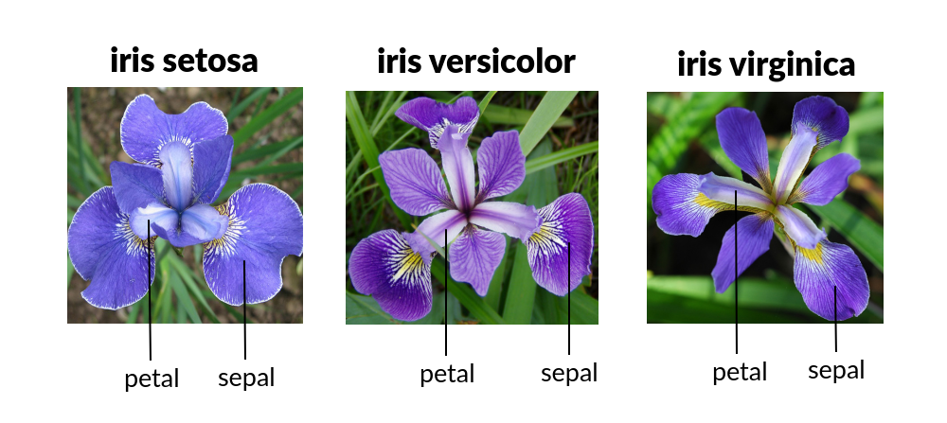

### Objective:

Our objective is to employ the KMeans clustering algorithm to identify clusters within this dataset based on the feature measurements. Although the species labels are available, we'll keep them aside for now, harnessing only the feature values to explore the natural groupings that KMeans can unveil.

By delving into this activity, we aim to:

1. Understand the process of KMeans clustering.
2. Discover the optimal number of clusters using the Elbow method and Silhouette analysis.
3. Interpret the clusters formed and compare them with the actual species labels - a step closer to grasping the essence of unsupervised learning.

We're not just chasing the correct number of clusters; we're chasing the understanding that comes with visualizing and interpreting the patterns unveiled by KMeans. Through this, we edge closer to mastering unsupervised learning, one cluster at a time.

So, let's roll up our sleeves and immerse ourselves in the world of clustering!

## Import necessary libraries

We import the libraries required for clustering and visualization.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets # Importing the sklearn.datasets module where the iris data is stored

from sklearn.cluster import KMeans 
# For silhouette analysis
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer # for sillouette plot

You may need install `yellowbrick` package, you can do it by uncomment the following cell :

In [14]:
#pip install yellowbrick

## Step 1: Loading the Data

Load the Iris dataset from the sklearn.datasets module

In [3]:
# Load the iris data
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Get features data
df['target'] = iris.target # Get target data

### Explore the iris data type and description

The iris data is stored as a **sklearn.utils.Bunch**

In [11]:
type(iris)

sklearn.utils.Bunch

The **sklearn.utils.Bunch** is a data structure in the scikit-learn library that is used to represent datasets. It is a simple container that stores data in a dictionary-like format.

The **Bunch** object contains the following attributes:

- **data:** This attribute holds the actual data points of the dataset. It is usually a 2-dimensional array-like structure, where each row represents an individual sample and each column represents a specific feature or attribute of that sample.

- **target:** This attribute stores the target values or labels associated with each data point. It is typically a 1-dimensional array-like structure that corresponds to the class or category of each sample in the dataset.

- **feature_names:** This attribute contains the names or labels of the features in the dataset. It is an optional attribute and may not be present in all Bunch objects.

- **target_names:** This attribute stores the names or labels of the target classes or categories. It is also an optional attribute and may not be present in all Bunch objects.

- **DESCR:** This attribute provides a description or summary of the dataset. It usually includes information about the dataset's source, usage, and other relevant details.

The **Bunch** object allows convenient access to the dataset's attributes using dot notation. 

For example, you can access the data using **bunch.data**, the target values using **bunch.target**, and so on.

Overall, the **sklearn.utils.Bunch** provides a standardized way to store and access datasets in scikit-learn, making it easier to work with and analyze the data.

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In this case, we can get features by iris.data and target by iris.target

## Step 2: Explore the Data

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


You should see a table with 5 columns: `sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm),` and `target`. 
The first four columns are features that describe the properties of the Iris flower. The `target` column is the label - it represents the species of the Iris flower.

In [18]:
# Checking the unique value of the target
df.target.unique()

array([0, 1, 2])

In [9]:
# we can get target name with the key 'target_names' predefined in the iris dataset in sklearn
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The dataset contains measurements of sepal length and width, and petal length and width of Iris flowers. 

The target variable is the species of the Iris flower, represented by an integer :
- 0 : Iris Setosa
- 1 : Iris Versicolour
- 2 : Iris Virginica

### Visualizing the Data

To better understand the relationships in the data, we can use visualizations. A pairplot can help us see the relationships between pairs of features.

This will create a matrix of scatter plots. Each scatter plot shows the relationship between two features, with different colors representing different species of Iris. You can observe how different species cluster differently based on these features.

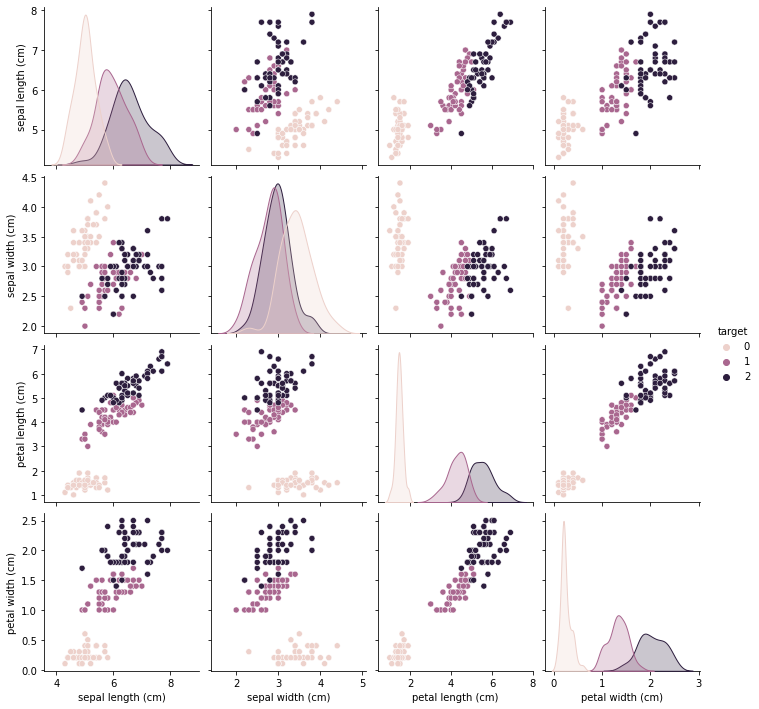

In [12]:
sns.pairplot(df, hue='target')
plt.show()

The pairplot is a great tool to visualize the distribution and relationship between different pairs of features. Here's what you might notice:

- The distributions along the diagonal of the pairplot show that some features, like petal length and petal width, can help distinguish between Iris species quite well. The Iris-setosa (represented by 0) tends to have smaller petal lengths and widths than the other two species.

- The scatter plots off the diagonal allow us to see the relationships between two different features. For example, there's a clear correlation between petal length and petal width: as one increases, so does the other.

- Certain combinations of features cluster the Iris species better. For instance, when you look at the scatter plot of petal length against petal width, the Iris-setosa species is distinctly separated from the other two.


### Discussion

- What do you notice about the relationships between different pairs of features?

- How does the distribution of data points differ between different species of Iris?

- Which features do you think might contribute most to distinct clustering?

Based on the pairplot, the features that show the clearest distinctions between species are petal length and petal width. These features might be the most useful for predicting the species of an Iris flower.

Iris-setosa tends to have smaller petals compared to the other species, making it easier to distinguish using petal measurements.

Iris-versicolor and Iris-virginica seem more difficult to tell apart based on the given features, as their measurements overlap quite a bit. This overlap may present a challenge when we try to build a machine learning model.


## Step 3: Determine the Optimal Number of Clusters

Let's assume we don't know there are three species,and use the elbow method and silhouette analysis to find the optimal number of clusters.

To do this, we will select only the features from the iris data (without the target)

### 1. Using the Elbow Method

The Elbow Method is a technique used to help us find the optimal number of clusters for K-Means clustering. It's called "the elbow method" because the graph we use to find this number often resembles an arm with an elbow!

The optimal number of clusters is usually the one where the 'elbow' occurs in the plot, i.e., where the decrease in Inertia/WCSS starts to slow down.

**Inertia:** Inertia measures the sum of distances of all the points within a cluster from the centroid of that cluster. It's used to evaluate the clustering model. The smaller the inertia value, the better our clusters are because the distance from the centroid is small, which means similar points are grouped together.

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


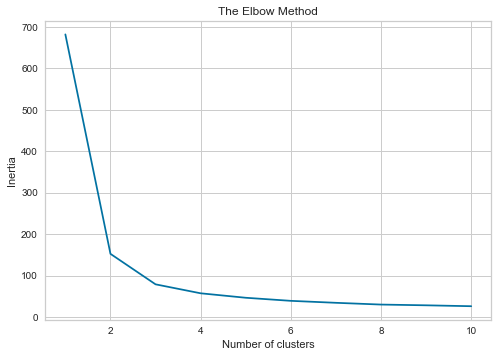

In [15]:
inertia = []  # inertia or Within-Cluster-Sum-of-Squares, lower values are better
for i in range(1, 11):  # Test with number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(iris.data)
    inertia.append(kmeans.inertia_)  # inertia_ is the WCSS for the current model

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Note:** the Elbow Method gives an indication of the possible good choices for K but doesn't guarantee the best K. It's a heuristic method, and in some cases, the "elbow" may not be very clear or may not even exist. In such cases, other methods or domain knowledge may be needed to choose a suitable K.

### 2. Using Silhouette Analysis

The silhouette score is a measure of how close each sample in one cluster is to the samples in the neighboring clusters. It ranges from -1 to 1, and a higher value indicates that samples are well clustered.

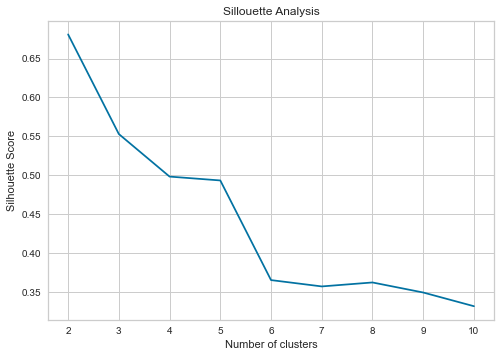

In [16]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(iris.data)
  labels = kmeans.labels_
  sil.append(silhouette_score(iris.data, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil)
plt.title('Sillouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here, the highest value of silouette score is for the k-means model with 2 clusters

#### Sillouette plot

- Sillouette plot of a kmeans with 2 cluster

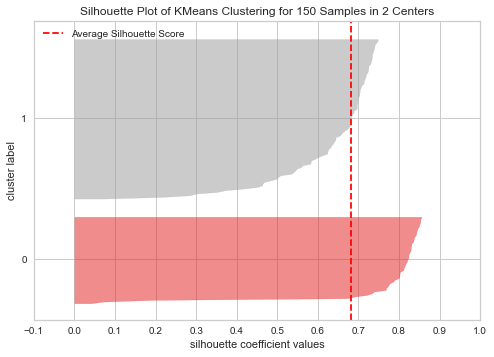

# of clusters: 2
Silhouette score 0.6810461692117462


In [17]:
silh = SilhouetteVisualizer(KMeans(2, random_state = 0))
silh.fit(iris.data)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a kmeans with 3 cluster

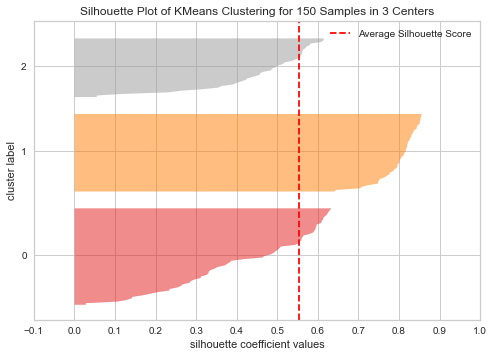

# of clusters: 3
Silhouette score 0.5528190123564102


In [8]:
silh = SilhouetteVisualizer(KMeans(3, random_state = 0))
silh.fit(iris.data)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a kmeans with 4 cluster

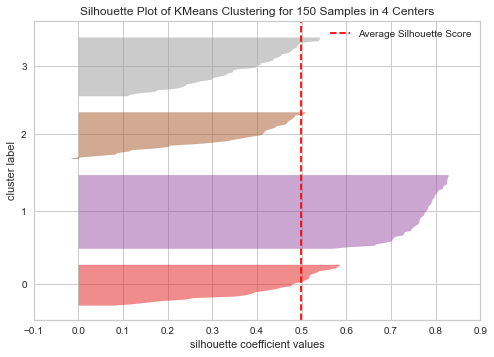

# of clusters: 4
Silhouette score 0.49805050499728803


In [9]:
silh = SilhouetteVisualizer(KMeans(4, random_state = 0))
silh.fit(iris.data)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

## Step 4: Apply & Visualize & Compare the KMeans clusters

In this part, We will use two features for simplicity to make a 2D plot.

We'll choose petal length and petal weight because thay show the clearest distinctions between species.

We'll see the data points colored according to their cluster, with the centroids of the clusters in golden.

### KMeans with 2 clusters

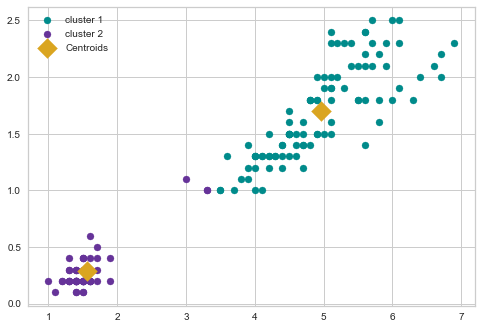

In [18]:
# Fit and make 2 clusters 
kmeans = KMeans(n_clusters=2)
kmeans_clusters = kmeans.fit_predict(iris.data)

# Visualize clusters
plt.scatter(iris.data[kmeans_clusters == 0, 2], iris.data[kmeans_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')
plt.scatter(iris.data[kmeans_clusters == 1, 2], iris.data[kmeans_clusters == 1, 3], 
            color='rebeccapurple', label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
plt.legend()
plt.show()

#### Comparison with the true spicies

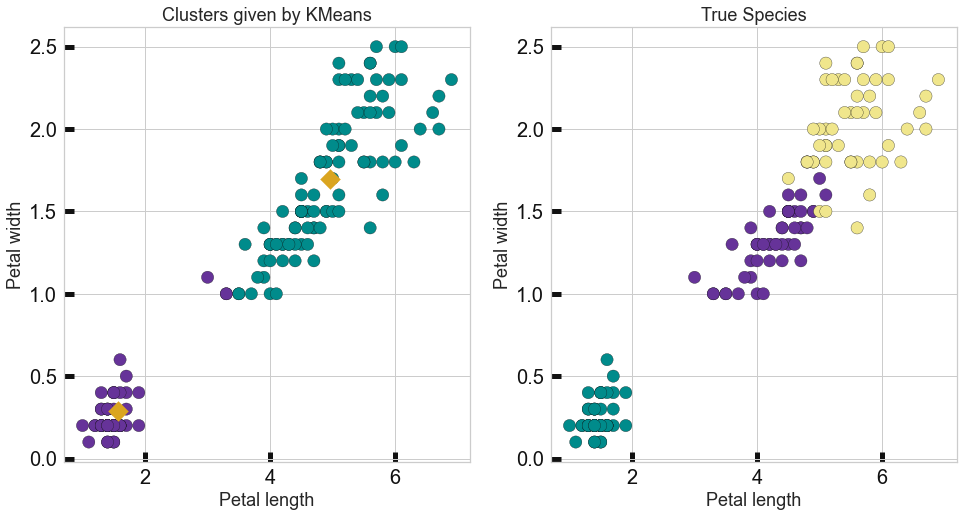

In [19]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(kmeans_clusters).map(colors),
            edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by KMeans', fontsize=18)
axes[0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
# This chunk of code creates a scatter plot of the data points, 
# colored by the predicted cluster from KMeans. The axes are labeled and the title of the graph is set.


# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

### KMeans with 3 clusters

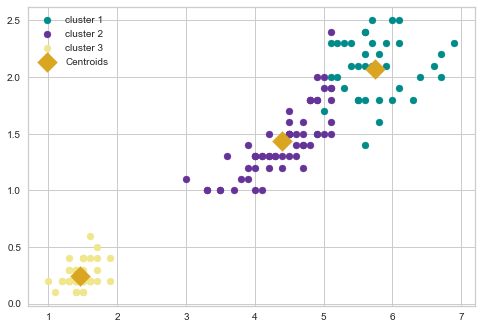

In [20]:
# Fit and make 3 clusters 
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(iris.data)

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Visualize clusters
plt.scatter(iris.data[kmeans_clusters == 0, 2], iris.data[kmeans_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')

plt.scatter(iris.data[kmeans_clusters == 1, 2], iris.data[kmeans_clusters == 1, 3], 
            color='rebeccapurple', label='cluster 2')

plt.scatter(iris.data[kmeans_clusters == 2, 2], iris.data[kmeans_clusters == 2, 3], 
            color='khaki', label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
plt.legend()
plt.show()

#### Comparison with the true spicies

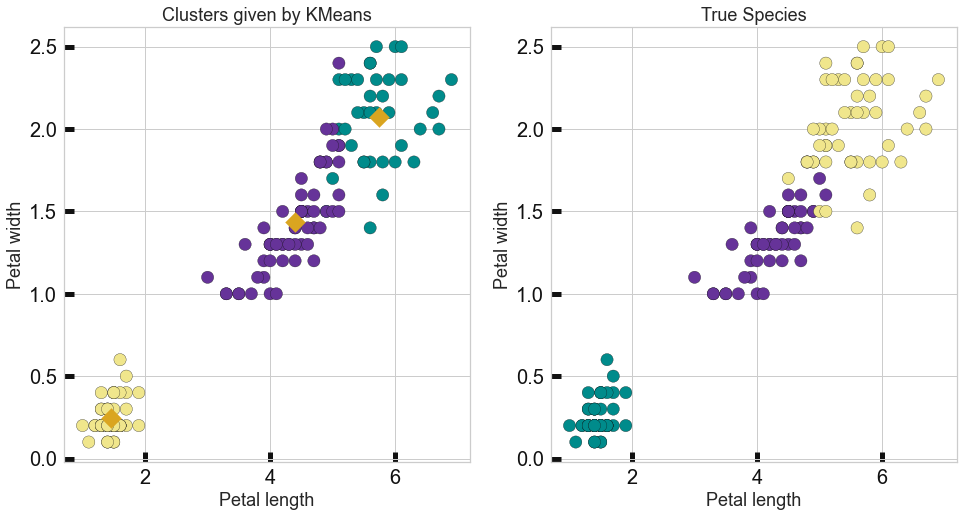

In [21]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(kmeans_clusters).map(colors),
            edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by KMeans', fontsize=18)
axes[0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
# This chunk of code creates a scatter plot of the data points, 
# colored by the predicted cluster from KMeans. The axes are labeled and the title of the graph is set.

# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

**Note:** The group numbers assigned in clustering are arbitrary and do not carry any inherent meaning. It is important to understand that the groups themselves are what matter, not their specific numbering or representation. The main focus should be on the patterns, relationships, and characteristics within each group, rather than the specific label assigned to them.

## Discussion

1. How do the clusters formed correlate with the actual categories in the data? Are there distinct separations?
2. Do you observe any clusters that seem less cohesive? What might be contributing to this?
4. How might changing the number of clusters (k) affect the results and interpretation of the clustering?

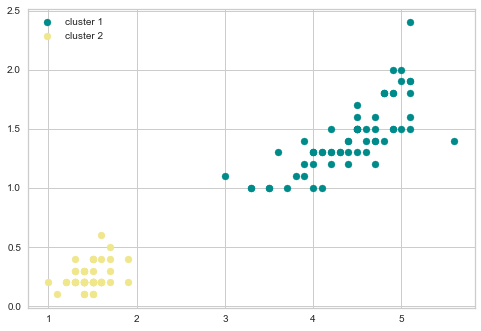

In [53]:
plt.scatter(iris.data[agglo_clusters == 0, 2], iris.data[agglo_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')
plt.scatter(iris.data[agglo_clusters == 1, 2], iris.data[agglo_clusters == 1, 3], 
            color='khaki', label='cluster 2')
plt.legend()
plt.show()

#### Comparison with the true spicies

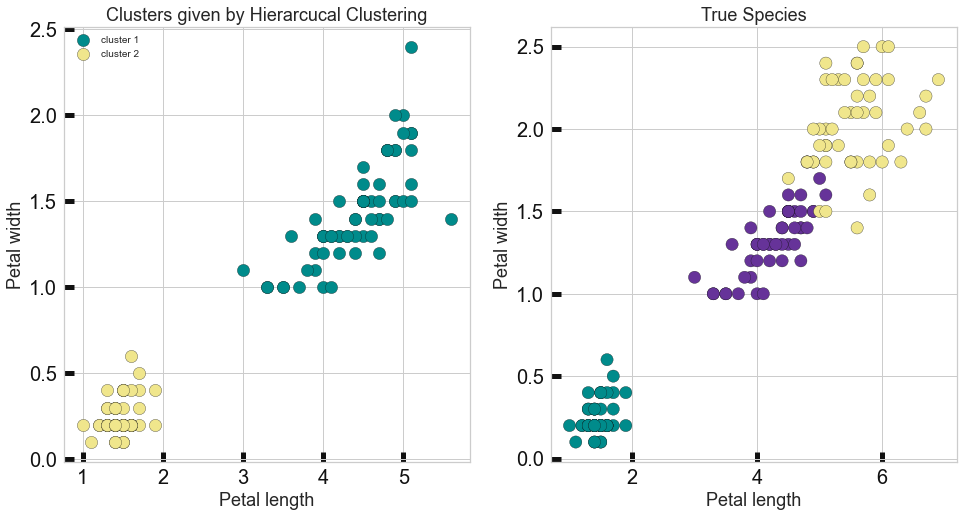

In [45]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot:
axes[0].scatter(iris.data[agglo_clusters == 0, 2], iris.data[agglo_clusters == 0, 3], 
            color='darkcyan', label='cluster 1', edgecolor='k', s=150)
axes[0].scatter(iris.data[agglo_clusters == 1, 2], iris.data[agglo_clusters == 1, 3], 
            color='khaki', label='cluster 2', edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by Hierarcucal Clustering', fontsize=18)
axes[0].legend()

# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)
# This chunk of code creates another scatter plot of the data points, 
# this time colored by their actual species. Again, the axes are labeled and the title of the graph is set.

plt.show()

- For 3 clusters

0.5543236611296419


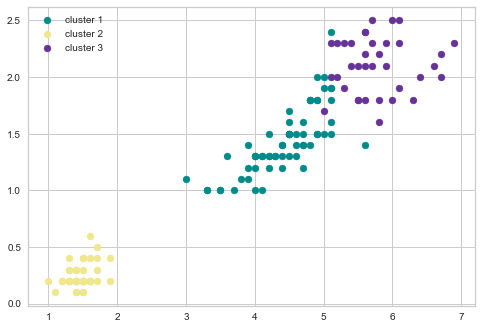

In [28]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_clusters = agglo.fit_predict(iris.data)

print(silhouette_score(iris.data, agglo_clusters, metric = 'euclidean'))

plt.scatter(iris.data[agglo_clusters == 0, 2], iris.data[agglo_clusters == 0, 3], 
            color='darkcyan', label='cluster 1')
plt.scatter(iris.data[agglo_clusters == 1, 2], iris.data[agglo_clusters == 1, 3], 
            color='khaki', label='cluster 2')
plt.scatter(iris.data[agglo_clusters == 2, 2], iris.data[agglo_clusters == 2, 3], 
            color='rebeccapurple', label='cluster 3')

plt.legend()
plt.show()

#### Comparison with the true spicies

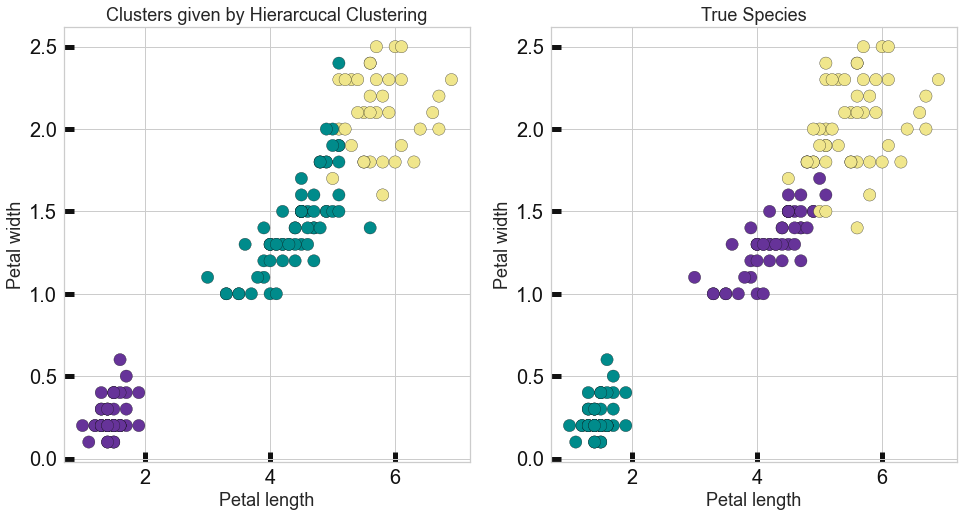

In [31]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the identified clusters and compare with the answers

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Creating the First Subplot (in a differente way as the previous one, for inspiration)
axes[0].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(agglo_clusters).map(colors), edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Clusters given by Hierarcucal Clustering', fontsize=18)


# Creating the Second Subplot
axes[1].scatter(iris.data[:, 2], iris.data[:, 3], c=pd.Series(iris.target).map(colors),
            edgecolor='k', s=150)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('True Species', fontsize=18)

plt.show()

#### Visualize the dendogram

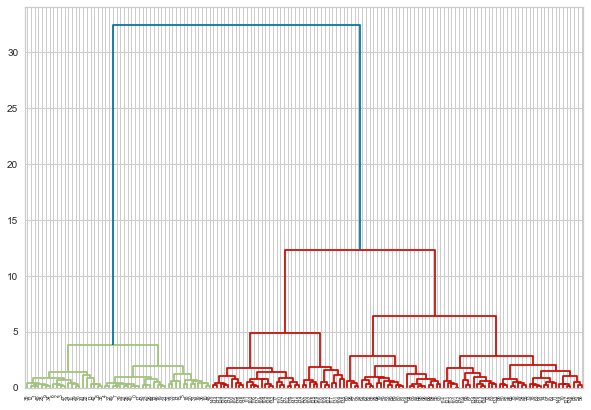

In [50]:
# Perform hierarchical clustering
Z = linkage(iris.data, method='ward')

# Create a dendrogram
fig = plt.figure(figsize=(10, 7))
dn = dendrogram(Z)

plt.show()

The process involves two steps: 
- First, you apply PCA with the total number of features to determine how many principal components are needed to explain a certain amount of variance. 
- Second, you perform PCA again using the desired number of components to transform your data.

The Iris dataset has 4 features, so we'll initially set n_components=4 in the PCA.

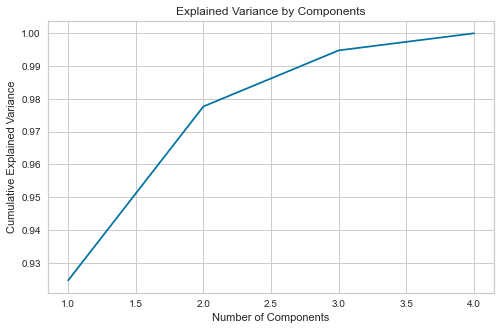

In [57]:
# Fit PCA to the data
pca = PCA(n_components=4)
pca.fit(iris.data)
# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In this plot, the x-axis shows the number of principal components, and the y-axis shows the cumulative explained variance. This helps you see how much of the variance in your data is explained by the first component, the first two components together, the first three components together, and so on.

A commonly used approach is to select the smallest number of principal components that explain a large proportion of the variance, typically around 95% or 99%. However, the exact threshold can vary depending on your specific use case.

In this case, the first 2 PCA explain almost 98% of the variance.

**Note:** that this is a simplified example using the Iris dataset, which only has 4 features. For larger, real-world datasets, the process would be similar, but you may have many more components to consider.

Now, we apply PCA again using 2 principal components

In [42]:
# Perform PCA with the chosen number of components : 2
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(iris.data)
# X_pca2 now contains your data transformed to the first 2 principal components.

The variable `X_pca` now holds the transformed data in the space of the first 2 principal components. 

#### Visualise the PCA 

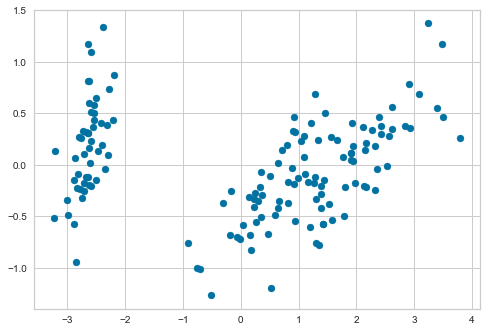

In [43]:
# Visualize the PC1 and PC2
plt.scatter(X_pca2[:,0], X_pca2[:,1])
plt.show()

This transformed data can be used for further analysis or modeling, and should hopefully retain most of the important information from the original features, while reducing the dimensionality of the dataset.

#### **Examples : Using PCA with other algorithm**

For example, we can apply the Decision Tree Classifier or KMeans Clustering to our chosen PCA instead of our features.

In this case, we'll apply on X_pca2 data

#### Decision Tree 

In [35]:
# Importing necessery librairies for this task
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca2, iris.target, test_size=0.2, random_state=42)
# Create the decision tree classifier
dt = DecisionTreeClassifier()
# Fit the model 
dt.fit(X_train, y_train)
# Calculate prediction
predictions = dt.predict(X_test)
# get performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Kmeans

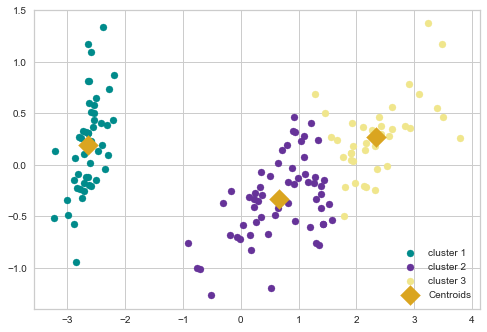

In [41]:
# Fit and make 3 clusters 
kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(X_pca2)

colors = {0:'darkcyan', 1:'rebeccapurple', 2:'khaki'}

# Visualize clusters
plt.scatter(X_pca2[kmeans_clusters == 0, 0], X_pca2[kmeans_clusters == 0, 1], 
            color='darkcyan', label='cluster 1')

plt.scatter(X_pca2[kmeans_clusters == 1, 0], X_pca2[kmeans_clusters == 1, 1], 
            color='rebeccapurple', label='cluster 2')

plt.scatter(X_pca2[kmeans_clusters == 2, 0], X_pca2[kmeans_clusters == 2, 1], 
            color='khaki', label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='goldenrod', s=200, marker = 'D', label='Centroids')
plt.legend()
plt.show()

### Visualize the 2 PCA with species

#### Visualise the PCA with spiecies

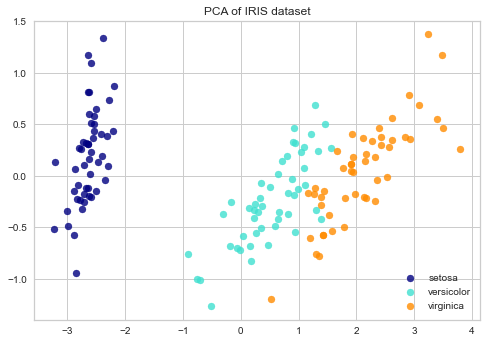

In [36]:
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca2[iris.target == i, 0], X_pca2[iris.target == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()